<h2 align='center'>Prediction using Unsupervised ML</h2>

### Predict the optimum number of clusters for ‘Iris’ dataset and represent it visually. 

#### K-means clustering is used to quickly discover insights from unlabeled data.
K-means is a simple unsupervised machine learning algorithm that groups data into a specified number (k) of clusters. Because the user must specify in advance what k to choose, the algorithm is somewhat naive – it assigns all members to k clusters even if that is not the right k for the dataset.

In [ ]:
# Uncomment this to find the available styles
# plt.style.available

In [ ]:
import warnings 
warnings.simplefilter('ignore')

In [1]:
# import the required libraries
import pandas as pd     
import numpy as np

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# Use the inline backend
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# load the data 
df = pd.read_csv('Iris.csv', index_col=0)
# display the first n (default=5) rows using .head() 
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Explore the data :

In [3]:
# Lets first have a descriptive exploration of our data.
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# More info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


There are no null values. All columns have correct data types

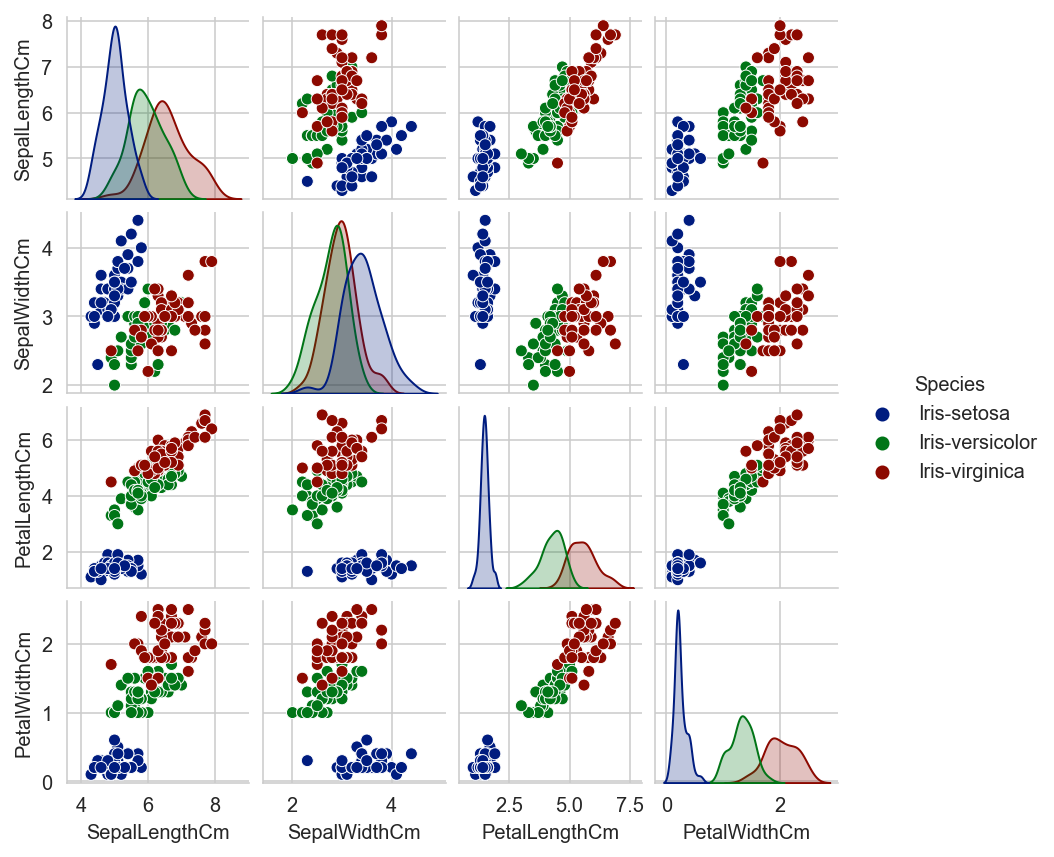

In [7]:
# plot the seaborn pair plot
#pd.plotting.scatter_matrix(df, figsize=(10,8), color='green');
#plt.figure(figsize=(5,5))
sns.pairplot(df, hue='Species', height=1.5);

 Above plot highlights that **'Iris-setosa'** stands out as a distinct cluster in each comparison

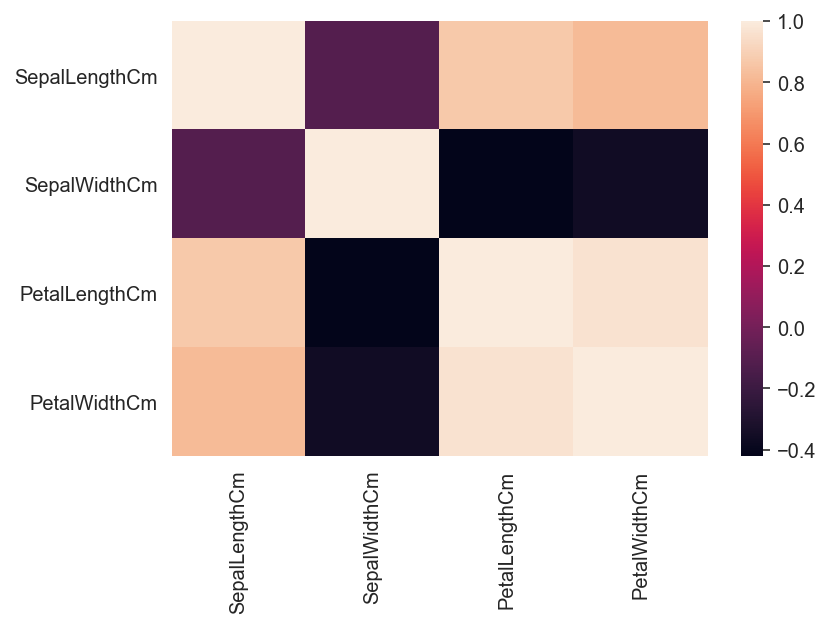

In [8]:
# Visualize the co relation among the features
sns.heatmap(df.corr());

Petal length and width show a strong co relation whereas sepal length and width dont.

### Prepare the data

In [9]:
# Drop the species column and consider only the features
X = df.drop('Species',axis=1).values

#### Normalizing over the standard deviation :

Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

In [10]:
from sklearn.preprocessing import StandardScaler

clus_dataSet = StandardScaler().fit_transform(X)

#### Elbow method for finding the optimum number of clusters i.e. 'K' for K-Means clustering.

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters.

If you get a visualizer that doesn’t have an elbow or inflection point, then this method may not be working. The elbow method does not work well if the data is not very clustered; in this case, you might see a smooth curve and the value of k is unclear. 

- Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
- Inertia: It is the sum of squared distances of samples to their closest cluster center.

In [11]:
inertias = []
distortions = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))/X.shape[0])

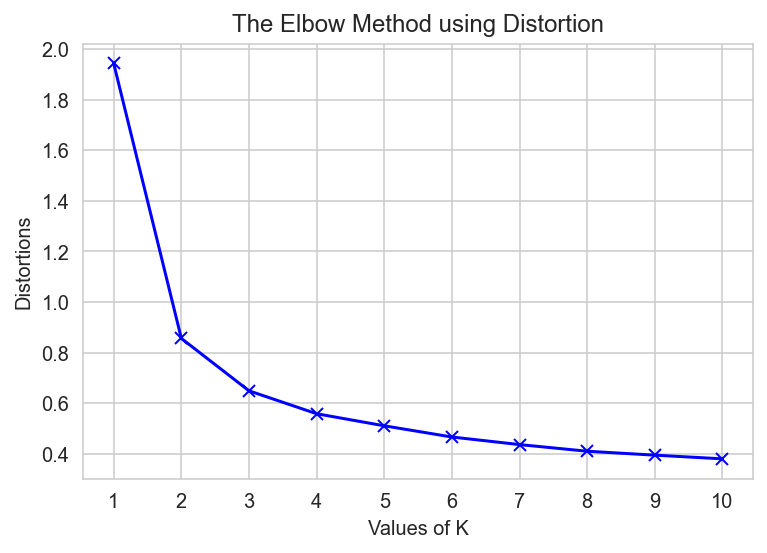

In [12]:
plt.plot(range(1,11), distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortions') 
plt.title('The Elbow Method using Distortion')
plt.xticks(list(range(1,11)))
plt.show()

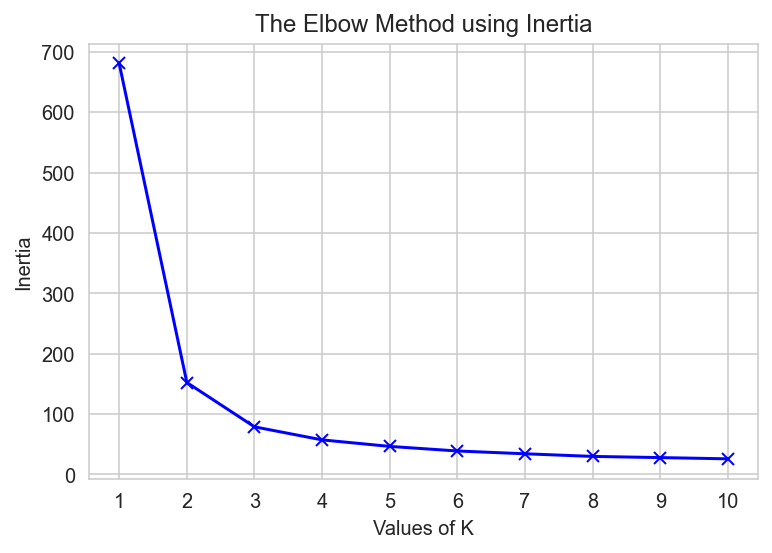

In [13]:
plt.plot(range(1,11), inertias, 'bx-') 
plt.title('The Elbow Method using Inertia') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.xticks(list(range(1,11)))
plt.show() 

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

In [14]:
# Applying kmeans to the Iris dataset with k=3 (optimal value of k)
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 42)
labels = kmeans.fit_predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

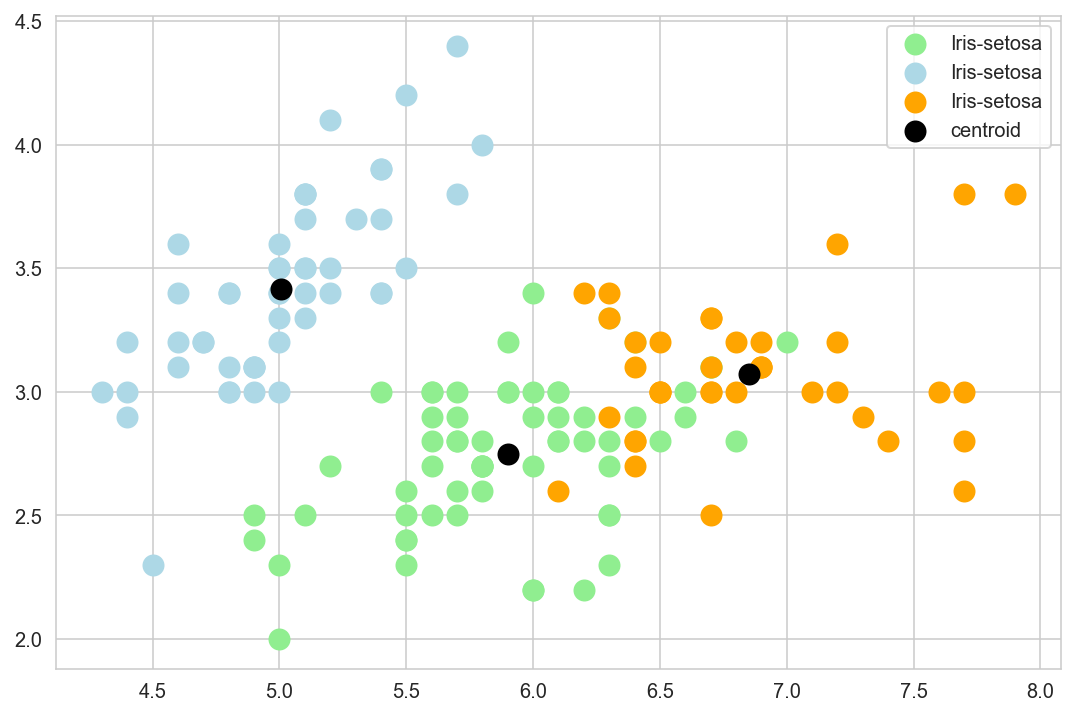

In [17]:
# Visualizing the clusters on the first two columns
plt.figure(figsize=(9,6))
plt.scatter(X[labels==0,0], X[labels==0,1], s=100, c='lightgreen', label='Iris-setosa')
plt.scatter(X[labels==1,0], X[labels==1,1], s=100, c='lightblue', label='Iris-setosa')
plt.scatter(X[labels==2,0], X[labels==2,1], s=100, c='orange', label='Iris-setosa')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='k', 
            label='centroid')
plt.legend();

Some real-world applications of k-means:

- Customer segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression

<h2 align='center'>Thankyou for reading</h2>